<a href="https://colab.research.google.com/github/VijayantShri/Machine_Learning_Models/blob/main/Stock_Prediction_Model/TATA_Stock_Prediction(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv("NSE-TATAGLOBAL.csv")

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a Data structure with 60 timestamp and 1 output.

In [6]:
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Importing some of the modules from **Keras**.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units=1))

In [14]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 10s 80ms/step - loss: 0.0207
Epoch 2/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0021
Epoch 3/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0022
Epoch 4/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 5s 81ms/step - loss: 0.0018
Epoch 7/100
62/62 [==============================] - 5s 81ms/step - loss: 0.0018
Epoch 8/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0019
Epoch 9/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 5s 80ms/step - loss: 0.0016
Epoch 11/100
62/62 [==============================] - 5s 81ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 5s 81ms/step - loss: 0.0014
Epoch 13/100
62/62 [====

**Making Predictions and Visualizing the results**

First We import the test data

In [16]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

*Prediction*

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [18]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
predicted_stock_price[0][0]

122.07147

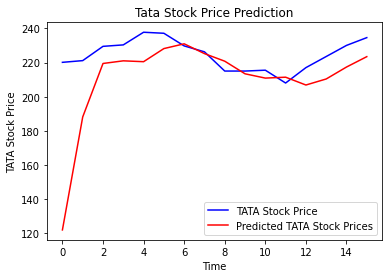

In [21]:
plt.plot(real_stock_price, color='blue', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted TATA Stock Prices')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()